In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
# Set GPU device
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [1]:
import pandas as pd
import glob
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the folder in your Google Drive where the CSV files are located
path = '/content/drive/My Drive/cicics-2017-dataset-new'  #
all_files = glob.glob(path + "/*.csv")

li = []

# Loop through each CSV file in the specified folder
for filename in all_files:
    df = pd.read_csv(filename, encoding='cp1252', index_col=None, header=0)
    li.append(df)
    print("Read Completed for ", filename)

# Concatenate all DataFrames
df = pd.concat(li, axis=0 , ignore_index=True)

# Rename the column if needed
df = df.rename(columns={' Label': 'Label'})

# Display the first few rows of the concatenated DataFrame
df.head()


Mounted at /content/drive
Read Completed for  /content/drive/My Drive/cicics-2017-dataset-new/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
df["Label"].value_counts()

,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [ ]:
print(df.shape)

(2830743, 79)


In [ ]:
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

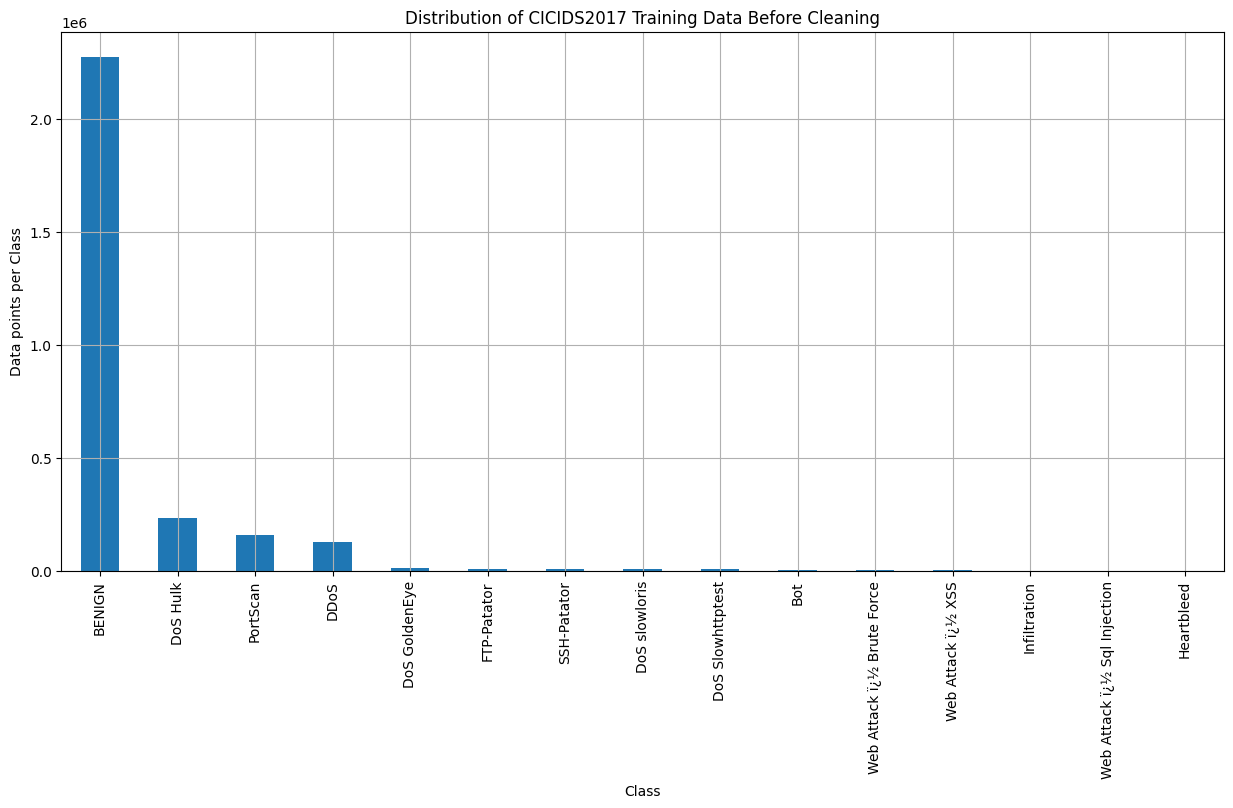

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of CICIDS2017 Training Data Before Cleaning')
plt.grid()
plt.show()

# Before Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

In [ ]:
del sorted_ds

#drop na values and reset index
data_clean = df.dropna().reset_index()

# Checkng for DUPLICATE values
data_clean.drop_duplicates(keep='first', inplace = True)

data_clean['Label'].value_counts()

print("Read {} rows.".format(len(data_clean)))

Read 2829385 rows.


In [ ]:
analyze(df)


2830743 rows
**  Destination Port:53805 (1%)
**  Flow Duration:1050899 (37%)
**  Total Fwd Packets:1432 (0%)
**  Total Backward Packets:1747 (0%)
** Total Length of Fwd Packets:17928 (0%)
**  Total Length of Bwd Packets:64698 (2%)
**  Fwd Packet Length Max:5279 (0%)
**  Fwd Packet Length Min:384 (0%)
**  Fwd Packet Length Mean:99716 (3%)
**  Fwd Packet Length Std:253909 (8%)
** Bwd Packet Length Max:4838 (0%)
**  Bwd Packet Length Min:583 (0%)
**  Bwd Packet Length Mean:147614 (5%)
**  Bwd Packet Length Std:248869 (8%)
** Flow Bytes/s:1593909 (56%)
**  Flow Packets/s:1240164 (43%)
**  Flow IAT Mean:1166311 (41%)
**  Flow IAT Std:1056642 (37%)
**  Flow IAT Max:580289 (20%)
**  Flow IAT Min:136316 (4%)
** Fwd IAT Total:493098 (17%)
**  Fwd IAT Mean:737737 (26%)
**  Fwd IAT Std:700313 (24%)
**  Fwd IAT Max:437316 (15%)
**  Fwd IAT Min:110631 (3%)
** Bwd IAT Total:414928 (14%)
**  Bwd IAT Mean:670824 (23%)
**  Bwd IAT Std:709042 (25%)
**  Bwd IAT Max:368285 (13%)
**  Bwd IAT Min:66074 (2%

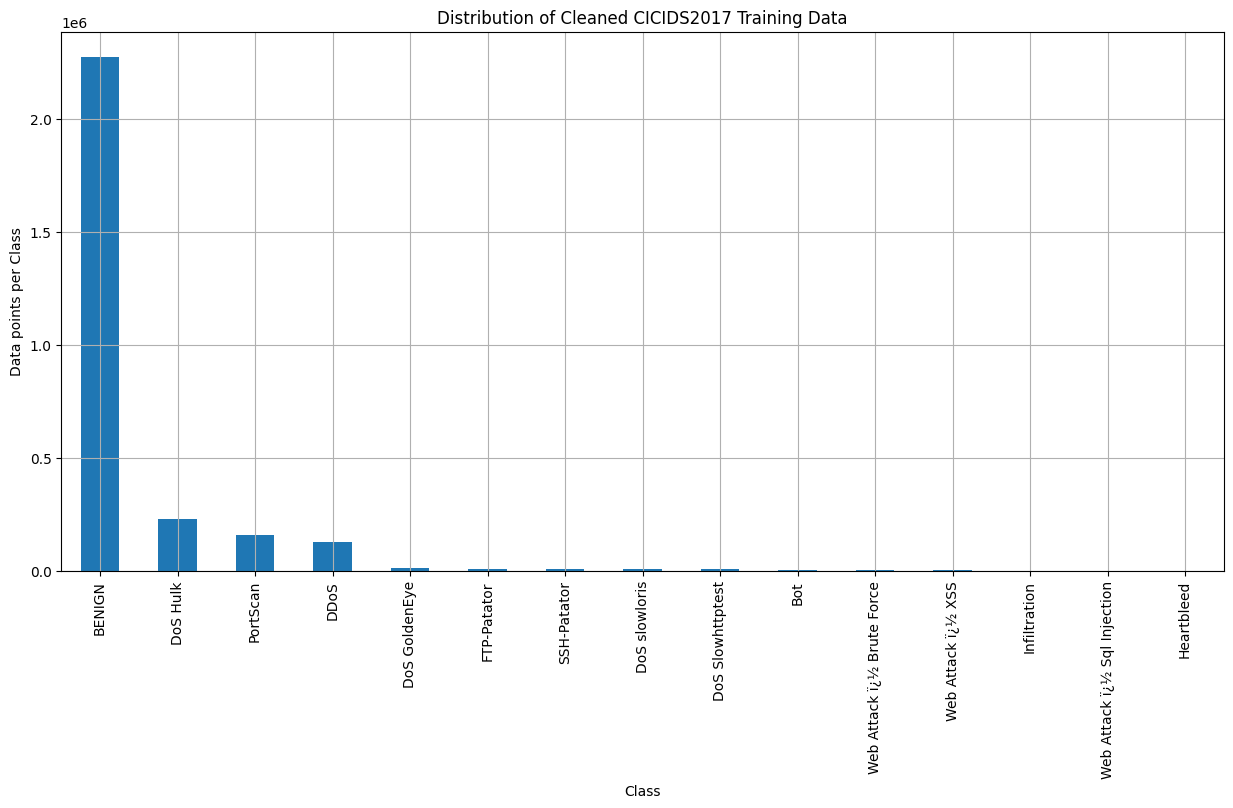

In [ ]:
plt.figure(figsize=(15,7))
class_distribution = data_clean['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Cleaned CICIDS2017 Training Data')
plt.grid()
plt.show()

In [ ]:
# After Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class BENIGN : 2272688 ( 80.286 %)
Number of data points in class DoS Hulk : 230124 ( 8.129 %)
Number of data points in class PortScan : 158930 ( 5.614 %)
Number of data points in class DDoS : 128027 ( 4.523 %)
Number of data points in class DoS GoldenEye : 10293 ( 0.364 %)
Number of data points in class FTP-Patator : 7938 ( 0.28 %)
Number of data points in class SSH-Patator : 5897 ( 0.208 %)
Number of data points in class DoS slowloris : 5796 ( 0.205 %)
Number of data points in class DoS Slowhttptest : 5499 ( 0.194 %)
Number of data points in class Bot : 1966 ( 0.069 %)
Number of data points in class Web Attack ï¿½ Brute Force : 1507 ( 0.053 %)
Number of data points in class Web Attack ï¿½ XSS : 652 ( 0.023 %)
Number of data points in class Infiltration : 36 ( 0.001 %)
Number of data points in class Web Attack ï¿½ Sql Injection : 21 ( 0.001 %)
Number of data points in class Heartbleed : 11 ( 0.0 %)


In [ ]:
# Check if the column name exists before attempting to drop it
if 'Flow ID' in data_clean.columns:
    data_clean = data_clean.drop('Flow ID', axis=1)
else:
    print("Column 'Flow ID' not found in DataFrame. Skipping drop operation.")

if ' Source IP' in data_clean.columns:
    data_clean = data_clean.drop(' Source IP', axis=1)
else:
    print("Column ' Source IP' not found in DataFrame. Skipping drop operation.")

if ' Destination IP' in data_clean.columns:
    data_clean = data_clean.drop(' Destination IP', axis=1)
else:
    print("Column ' Destination IP' not found in DataFrame. Skipping drop operation.")

if ' Timestamp' in data_clean.columns:
    data_clean = data_clean.drop(' Timestamp', axis=1)
else:
    print("Column ' Timestamp' not found in DataFrame. Skipping drop operation.")

Column 'Flow ID' not found in DataFrame. Skipping drop operation.
Column ' Source IP' not found in DataFrame. Skipping drop operation.
Column ' Destination IP' not found in DataFrame. Skipping drop operation.
Column ' Timestamp' not found in DataFrame. Skipping drop operation.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = data_clean.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

,count
Label,
0,2272688
4,230124
10,158930
2,128027
3,10293
7,7938
11,5897
6,5796
5,5499


In [ ]:
print(data_clean.shape)

(2829385, 81)


In [ ]:
data_np = data_clean.to_numpy(dtype="float32")

#drop inf values
data_np = data_np[~np.isinf(data_np).any(axis=1)]

X = data_np[:, 0:81]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,80:]).toarray()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

print('X.shape = ',X.shape)
print('Y.shape = ',Y.shape)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',Y_test.shape)

X.shape =  (2827876, 81)
Y.shape =  (2827876, 15)
X_train.shape =  (2120907, 81)
y_train.shape =  (2120907, 15)
X_test.shape =  (706969, 81)
y_test.shape =  (706969, 15)


In [ ]:
print("X Shape: ", X.shape)
print("Y Shape: ", Y.shape)

X Shape:  (2827876, 81)
Y Shape:  (2827876, 15)


In [ ]:
from keras import regularizers
from keras.layers import Dense, LeakyReLU, BatchNormalization, Input, LSTM, TimeDistributed, RepeatVector, Lambda
from keras import Input
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras import regularizers

In [ ]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (2120907, 1, 81)
Test data shape: (706969, 1, 81)


In [ ]:
print('X.shape = ',X.shape)
print('Y.shape = ',Y.shape)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',Y_test.shape)

X.shape =  (2827876, 81)
Y.shape =  (2827876, 15)
X_train.shape =  (2120907, 1, 81)
y_train.shape =  (2120907, 15)
X_test.shape =  (706969, 1, 81)
y_test.shape =  (706969, 15)


In [ ]:
print('Input Features: ', _features)
print('Input Classes: ', n_classes)

Input Features:  81
Input Classes:  15


# LSTM-AE Model

In [ ]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(196, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(125, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(125, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(196, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

# With default learning rate and mse loss function.

In [ ]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1, 81)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 1, 196)              │         217,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 125)                 │         161,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_2 (RepeatVector)       │ (None, 1, 125)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 1, 125)              │         125,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 1, 196)              │         252,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 1, 81)               │          15,957 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 772,857 (2.95 MB)

 Trainable params: 772,857 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit the model to the data
history = model.fit(X_train, X_train, epochs=5, batch_size=128, validation_split=0.05).history

In [ ]:
import time

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 47s 2ms/step
Inference time: 57.69 seconds


# With learning rate=0.0001 and mse loss function.

In [ ]:
# create the autoencoder model
model = autoencoder_model(X_train)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss='mse', metrics='accuracy')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 81)]           0         
                                                                 
 lstm_8 (LSTM)               (None, 1, 196)            217952    
                                                                 
 lstm_9 (LSTM)               (None, 125)               161000    
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 125)           0         
 or)                                                             
                                                                 
 lstm_10 (LSTM)              (None, 1, 125)            125500    
                                                                 
 lstm_11 (LSTM)              (None, 1, 196)            252448    
                                                           

In [ ]:
# fit the model to the data
history = model.fit(X_train, X_train, epochs=5, batch_size=128, validation_split=0.05).history

Epoch 1/5
31483/31483 [==============================] - 179s 12ms/step - loss: 0.0129 - accuracy: 0.7986 - val_loss: 0.0103 - val_accuracy: 0.8939
Epoch 2/5
31483/31483 [==============================] - 164s 12ms/step - loss: 0.0108 - accuracy: 0.8911 - val_loss: 0.0097 - val_accuracy: 0.9039
Epoch 3/5
31483/31483 [==============================] - 170s 12ms/step - loss: 0.0107 - accuracy: 0.9020 - val_loss: 0.0100 - val_accuracy: 0.9151
Epoch 4/5
31483/31483 [==============================] - 175s 12ms/step - loss: 0.0061 - accuracy: 0.9131 - val_loss: 0.0040 - val_accuracy: 0.9358
Epoch 5/5
31483/31483 [==============================] - 156s 11ms/step - loss: 0.0059 - accuracy: 0.9201 - val_loss: 0.0040 - val_accuracy: 0.9398


In [ ]:
import time

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 41s 2ms/step
Inference time: 47.66 seconds


# With default learning rate and mae loss function.

In [ ]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae', metrics='accuracy')
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 81)]           0         
                                                                 
 lstm_12 (LSTM)              (None, 1, 196)            217952    
                                                                 
 lstm_13 (LSTM)              (None, 125)               161000    
                                                                 
 repeat_vector_3 (RepeatVect  (None, 1, 125)           0         
 or)                                                             
                                                                 
 lstm_14 (LSTM)              (None, 1, 125)            125500    
                                                                 
 lstm_15 (LSTM)              (None, 1, 196)            252448    
                                                           

In [ ]:
# fit the model to the data
history = model.fit(X_train, X_train, epochs=5, batch_size=128, validation_split=0.05).history

Epoch 1/5
31483/31483 [==============================] - 168s 12ms/step - loss: 0.0105 - accuracy: 0.8284 - val_loss: 0.0103 - val_accuracy: 0.9380
Epoch 2/5
31483/31483 [==============================] - 165s 12ms/step - loss: 0.0096 - accuracy: 0.9445 - val_loss: 0.0084 - val_accuracy: 0.9455
Epoch 3/5
31483/31483 [==============================] - 170s 12ms/step - loss: 0.0077 - accuracy: 0.9487 - val_loss: 0.0077 - val_accuracy: 0.9511
Epoch 4/5
31483/31483 [==============================] - 174s 12ms/step - loss: 0.0069 - accuracy: 0.9515 - val_loss: 0.0068 - val_accuracy: 0.9542
Epoch 5/5
31483/31483 [==============================] - 171s 12ms/step - loss: 0.0065 - accuracy: 0.9541 - val_loss: 0.0058 - val_accuracy: 0.9620


In [ ]:
import time

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 46s 2ms/step
Inference time: 52.01 seconds


# With learning rate=0.0001 and mae loss function.

In [ ]:
# create the autoencoder model
model = autoencoder_model(X_train)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss='mae', metrics='accuracy')
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 81)]           0         
                                                                 
 lstm_16 (LSTM)              (None, 1, 196)            217952    
                                                                 
 lstm_17 (LSTM)              (None, 125)               161000    
                                                                 
 repeat_vector_4 (RepeatVect  (None, 1, 125)           0         
 or)                                                             
                                                                 
 lstm_18 (LSTM)              (None, 1, 125)            125500    
                                                                 
 lstm_19 (LSTM)              (None, 1, 196)            252448    
                                                           

In [ ]:
# fit the model to the data
history = model.fit(X_train, X_train, epochs=5, batch_size=128, validation_split=0.05).history

Epoch 1/5
31483/31483 [==============================] - 186s 12ms/step - loss: 0.0094 - accuracy: 0.7934 - val_loss: 0.0064 - val_accuracy: 0.8873
Epoch 2/5
31483/31483 [==============================] - 164s 12ms/step - loss: 0.0063 - accuracy: 0.8449 - val_loss: 0.0062 - val_accuracy: 0.8886
Epoch 3/5
31483/31483 [==============================] - 182s 12ms/step - loss: 0.0078 - accuracy: 0.8898 - val_loss: 0.0062 - val_accuracy: 0.9044
Epoch 4/5
31483/31483 [==============================] - 174s 12ms/step - loss: 0.0052 - accuracy: 0.8983 - val_loss: 0.0041 - val_accuracy: 0.9244
Epoch 5/5
31483/31483 [==============================] - 183s 12ms/step - loss: 0.0040 - accuracy: 0.9162 - val_loss: 0.0042 - val_accuracy: 0.9387


In [ ]:
import time

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 42s 2ms/step
Inference time: 47.74 seconds


# With default learning rate and mae loss function, to 30 epochs.

In [ ]:
# create the autoencoder model
model = autoencoder_model(X_train)

model.compile(optimizer='adam', loss='mae', metrics='accuracy')
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 81)]           0         
                                                                 
 lstm_20 (LSTM)              (None, 1, 196)            217952    
                                                                 
 lstm_21 (LSTM)              (None, 125)               161000    
                                                                 
 repeat_vector_5 (RepeatVect  (None, 1, 125)           0         
 or)                                                             
                                                                 
 lstm_22 (LSTM)              (None, 1, 125)            125500    
                                                                 
 lstm_23 (LSTM)              (None, 1, 196)            252448    
                                                           

In [ ]:
# fit the model to the data
history = model.fit(X_train, X_train, epochs=30, batch_size=128, validation_split=0.05).history

Epoch 1/30
15742/15742 [==============================] - 181s 11ms/step - loss: 0.0101 - accuracy: 0.9465 - val_loss: 0.0076 - val_accuracy: 0.9848
Epoch 2/30
15742/15742 [==============================] - 189s 12ms/step - loss: 0.0094 - accuracy: 0.9632 - val_loss: 0.0068 - val_accuracy: 0.9871
Epoch 3/30
15742/15742 [==============================] - 190s 12ms/step - loss: 0.0082 - accuracy: 0.9798 - val_loss: 0.0067 - val_accuracy: 0.9888
Epoch 4/30
15742/15742 [==============================] - 191s 12ms/step - loss: 0.0070 - accuracy: 0.9829 - val_loss: 0.0062 - val_accuracy: 0.9921
Epoch 5/30
15742/15742 [==============================] - 186s 12ms/step - loss: 0.0064 - accuracy: 0.9847 - val_loss: 0.0058 - val_accuracy: 0.9924
Epoch 6/30
15742/15742 [==============================] - 176s 11ms/step - loss: 0.0059 - accuracy: 0.9862 - val_loss: 0.0053 - val_accuracy: 0.9925
Epoch 7/30
15742/15742 [==============================] - 177s 11ms/step - loss: 0.0058 - accuracy: 0.9882

In [ ]:
import time

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 48s 2ms/step
Inference time: 53.66 seconds


In [ ]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, auc
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


start = dt.datetime.now()

y_pred = model.predict(X_test)
escore = model.evaluate(X_test, X_test, batch_size=128)

# evaluate classification metrics (for multiclass targets)
#accuracy = accuracy_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
#precision = precision_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
#recall = recall_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
#f1 = f1_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
#confusion = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))



# print the results
#print("Accuracy: {:.3f}".format(accuracy))
#print("Precision: {:.3f}".format(precision))
#print("Recall: {:.3f}".format(recall))
#print("F1-score: {:.3f}".format(f1))
#print("Confusion Matrix:\n", confusion)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

5524/5524 [==============================] - 14s 3ms/step - loss: 0.0005 - accuracy: 0.9999
Completed
Time taken: 0:01:09.123427
